In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_rows', 100)
pd.set_option('max_columns', 100)

perc = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]

In [4]:
# 1. making/taking
readPath = "L:\\orderLog\\monthly return\\***\\taking_making.csv"
dataPathLs = np.array(glob.glob(readPath))
df = []
for i in dataPathLs:
    data = pd.read_csv(i)
    data['date'] = i.split('\\')[-2]
    df += [data]
df = pd.concat(df)
for col in ["buyRet", "buyAlpha", "sellRet", "sellAlpha"]:
    df[col] = df[col].apply(lambda x: x*10000)
df = df.sort_values(by='date')    
df

,exchange,order_type,buyOrderNum,buyRet,buyAlpha,sellOrderNum,sellRet,sellAlpha,date
0,SSE,making_order,3748,12.033538,10.475334,4829,8.287705,4.153168,202008
1,SSE,taking_order,267632,25.703864,23.038796,354021,13.620076,9.182887,202008
2,SZE,making_order,9888,10.192989,8.443072,14185,11.348084,6.410156,202008
3,SZE,taking_order,330167,23.847813,21.496300,457126,12.827128,8.333727,202008
0,SSE,making_order,25666,8.858607,8.171705,36149,6.023116,5.575826,202009
1,SSE,taking_order,588906,19.240289,17.677920,917451,11.288177,8.754323,202009
2,SZE,making_order,45926,18.517634,17.089653,66091,11.482314,10.324470,202009
3,SZE,taking_order,963585,23.011706,21.377931,1418856,12.213215,9.426528,202009
0,SSE,making_order,5849,9.905348,10.345159,6496,6.943408,7.748993,202010
1,SSE,taking_order,816448,18.430694,17.178788,1104605,11.144293,9.615825,202010


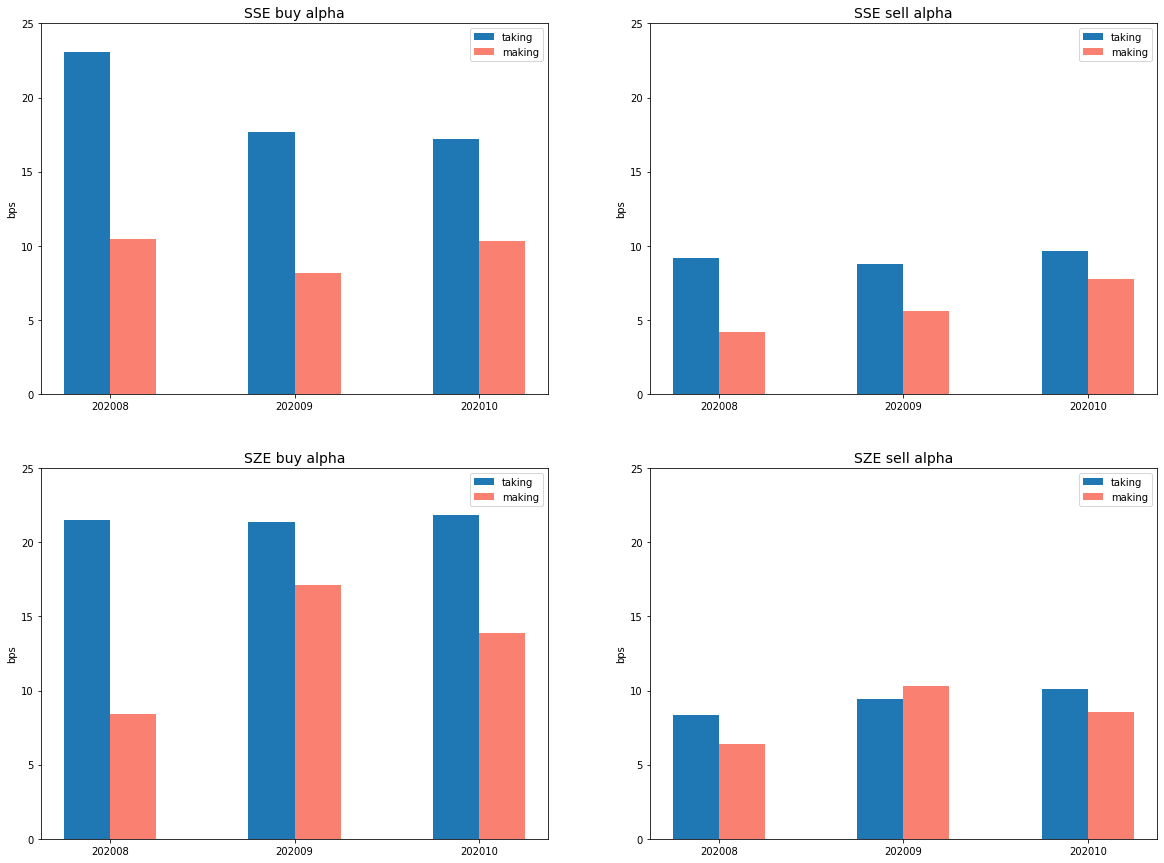

In [5]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['TimesNewRoman']
mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(221)
width = 0.25
ax1.bar(np.arange(3)-width/2, df[(df['exchange'] == 'SSE') & (df['order_type'] == 'taking_order')]['buyAlpha'], width = width, label='taking')
ax1.bar(np.arange(3)+width/2, df[(df['exchange'] == 'SSE') & (df['order_type'] == 'making_order')]['buyAlpha'], color='salmon', alpha=1, width=width, label='making')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SSE buy alpha", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,25)

ax1 = fig.add_subplot(222)
width = 0.25
ax1.bar(np.arange(3)-width/2, df[(df['exchange'] == 'SSE') & (df['order_type'] == 'taking_order')]['sellAlpha'], width = width, label='taking')
ax1.bar(np.arange(3)+width/2, df[(df['exchange'] == 'SSE') & (df['order_type'] == 'making_order')]['sellAlpha'], color='salmon', alpha=1, width=width, label='making')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SSE sell alpha", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,25)

ax1 = fig.add_subplot(223)
width = 0.25
ax1.bar(np.arange(3)-width/2, df[(df['exchange'] == 'SZE') & (df['order_type'] == 'taking_order')]['buyAlpha'], width = width, label='taking')
ax1.bar(np.arange(3)+width/2, df[(df['exchange'] == 'SZE') & (df['order_type'] == 'making_order')]['buyAlpha'], color='salmon', alpha=1, width=width, label='making')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SZE buy alpha", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,25)

ax1 = fig.add_subplot(224)
width = 0.25
ax1.bar(np.arange(3)-width/2, df[(df['exchange'] == 'SZE') & (df['order_type'] == 'taking_order')]['sellAlpha'], width = width, label='taking')
ax1.bar(np.arange(3)+width/2, df[(df['exchange'] == 'SZE') & (df['order_type'] == 'making_order')]['sellAlpha'], color='salmon', alpha=1, width=width, label='making')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SZE sell alpha", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,25)

plt.show()

In [6]:
# 2. separate by index
readPath = "L:\\orderLog\\monthly return\\***\\index.csv"
dataPathLs = np.array(glob.glob(readPath))
df = []
for i in dataPathLs:
    data = pd.read_csv(i)
    data['date'] = i.split('\\')[-2]
    df += [data]
df = pd.concat(df)
for col in ["buyRet", "buyAlpha", "sellRet", "sellAlpha"]:
    df[col] = df[col].apply(lambda x: x*10000)
df = df.sort_values(by='date')
df

,exchange,index_name,buyOrderNum,buyRet,buyAlpha,sellOrderNum,sellRet,sellAlpha,date
3,SSE,IF,58538.0,16.361683,13.002616,73647.0,13.462957,8.288452,202008
7,SZE,IF,46242.0,15.977686,12.970646,57422.0,9.935154,6.107843,202008
0,SSE,CSI1000,79918.0,29.077572,26.056628,112635.0,14.878615,10.630499,202008
1,SSE,CSIRest,79994.0,34.159456,32.218442,107058.0,15.307242,10.792726,202008
2,SSE,IC,52930.0,22.309891,20.237800,65510.0,9.301426,5.841444,202008
6,SZE,IC,65461.0,19.603970,17.064314,85756.0,11.115431,7.502174,202008
4,SZE,CSI1000,103135.0,25.630184,23.291582,155884.0,13.993155,8.753089,202008
5,SZE,CSIRest,125217.0,29.990582,28.245074,172249.0,14.801194,10.009727,202008
5,SZE,CSIRest,441993.0,28.142676,26.513891,653320.0,14.603094,11.925294,202009
4,SZE,CSI1000,289004.0,23.529156,21.470476,432039.0,13.558694,10.097818,202009


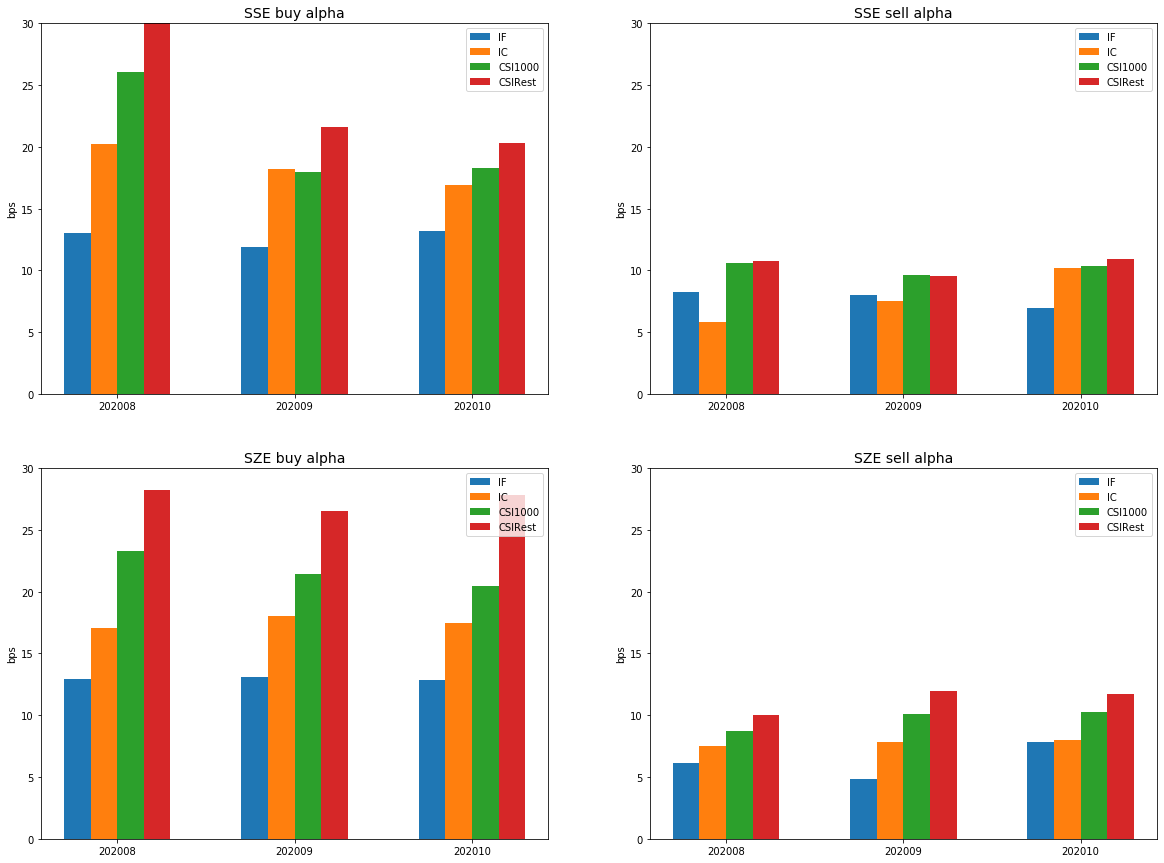

In [7]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['TimesNewRoman']
mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(221)
width = 0.15
ax1.bar(np.arange(3)-1.5 * width, df[(df['exchange'] == 'SSE') & (df['index_name'] == 'IF')]['buyAlpha'], width = width, label='IF')
ax1.bar(np.arange(3)-width/2, df[(df['exchange'] == 'SSE') & (df['index_name'] == 'IC')]['buyAlpha'], alpha=1, width=width, label='IC')
ax1.bar(np.arange(3)+width/2, df[(df['exchange'] == 'SSE') & (df['index_name'] == 'CSI1000')]['buyAlpha'], width = width, label='CSI1000')
ax1.bar(np.arange(3)+1.5 * width, df[(df['exchange'] == 'SSE') & (df['index_name'] == 'CSIRest')]['buyAlpha'], alpha=1, width=width, label='CSIRest')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SSE buy alpha", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,30)

ax1 = fig.add_subplot(222)
width = 0.15
ax1.bar(np.arange(3)-1.5 * width, df[(df['exchange'] == 'SSE') & (df['index_name'] == 'IF')]['sellAlpha'], width = width, label='IF')
ax1.bar(np.arange(3)-width/2, df[(df['exchange'] == 'SSE') & (df['index_name'] == 'IC')]['sellAlpha'], alpha=1, width=width, label='IC')
ax1.bar(np.arange(3)+width/2, df[(df['exchange'] == 'SSE') & (df['index_name'] == 'CSI1000')]['sellAlpha'], width = width, label='CSI1000')
ax1.bar(np.arange(3)+1.5*width, df[(df['exchange'] == 'SSE') & (df['index_name'] == 'CSIRest')]['sellAlpha'], alpha=1, width=width, label='CSIRest')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SSE sell alpha", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,30)

ax1 = fig.add_subplot(223)
width = 0.15
ax1.bar(np.arange(3)-1.5*width, df[(df['exchange'] == 'SZE') & (df['index_name'] == 'IF')]['buyAlpha'], width = width, label='IF')
ax1.bar(np.arange(3)-width/2, df[(df['exchange'] == 'SZE') & (df['index_name'] == 'IC')]['buyAlpha'], alpha=1, width=width, label='IC')
ax1.bar(np.arange(3)+width/2, df[(df['exchange'] == 'SZE') & (df['index_name'] == 'CSI1000')]['buyAlpha'], width = width, label='CSI1000')
ax1.bar(np.arange(3)+1.5*width, df[(df['exchange'] == 'SZE') & (df['index_name'] == 'CSIRest')]['buyAlpha'], alpha=1, width=width, label='CSIRest')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SZE buy alpha", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,30)

ax1 = fig.add_subplot(224)
width = 0.15
ax1.bar(np.arange(3)-1.5*width, df[(df['exchange'] == 'SZE') & (df['index_name'] == 'IF')]['sellAlpha'], width = width, label='IF')
ax1.bar(np.arange(3)-width/2, df[(df['exchange'] == 'SZE') & (df['index_name'] == 'IC')]['sellAlpha'], alpha=1, width=width, label='IC')
ax1.bar(np.arange(3)+width/2, df[(df['exchange'] == 'SZE') & (df['index_name'] == 'CSI1000')]['sellAlpha'], width = width, label='CSI1000')
ax1.bar(np.arange(3)+1.5*width, df[(df['exchange'] == 'SZE') & (df['index_name'] == 'CSIRest')]['sellAlpha'], alpha=1, width=width, label='CSIRest')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SZE sell alpha", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,30)

plt.show()

In [8]:
# 2. separate by strategy
readPath = "L:\\orderLog\\monthly return\\***\\sta.csv"
dataPathLs = np.array(glob.glob(readPath))
df = []
for i in dataPathLs:
    data = pd.read_csv(i)
    data['date'] = i.split('\\')[-2]
    df += [data]
df = pd.concat(df)
df = df.sort_values(by='date')
for col in ["buyRet_90s", "buyRet_300s", "buyAlpha_90s", "buyAlpha_300s", "sellRet_90s", "sellRet_300s", "sellAlpha_90s",  "sellAlpha_300s"]:
    df[col] = df[col].apply(lambda x: x*10000)
df

,exchange,sta,buyOrderNum,buyRet_90s,buyRet_300s,buyAlpha_90s,buyAlpha_300s,sellOrderNum,sellRet_90s,sellRet_300s,sellAlpha_90s,sellAlpha_300s,date
0,SSE,1. staone,84376,21.124764,22.487724,19.015799,20.879305,133516,10.889378,10.178862,6.111228,6.793496,202008
1,SSE,2. statwo,183256,27.389952,28.461482,24.520119,25.417222,220505,15.033565,13.327860,10.772867,10.322411,202008
2,SZE,1. staone,128524,19.766323,19.844378,18.073786,18.678753,217516,12.695279,11.677681,6.637269,8.426048,202008
3,SZE,2. statwo,201643,25.713493,23.928149,23.060758,21.626640,239610,12.926318,10.586365,9.609963,8.199842,202008
0,SSE,1. staone,94532,13.873124,11.409455,12.678215,10.515416,143083,9.986683,10.671471,9.172535,9.657241,202009
1,SSE,2. statwo,494374,20.136134,18.125492,18.512432,17.993548,774368,11.516843,11.629787,8.680846,8.033805,202009
2,SZE,1. staone,141486,20.440538,21.519854,18.872104,19.412305,225989,6.399731,8.291611,4.661089,6.260459,202009
3,SZE,2. statwo,822099,23.323787,21.966214,21.682081,21.575155,1192867,13.234241,12.051830,10.263485,8.444563,202009
0,SSE,1. staone,127135,14.576185,13.255512,13.890131,12.158297,184561,11.884532,12.660027,10.399638,10.180163,202010
1,SSE,2. statwo,681293,19.059439,18.352043,17.710885,17.127131,907699,11.001854,10.138021,9.463702,8.452201,202010


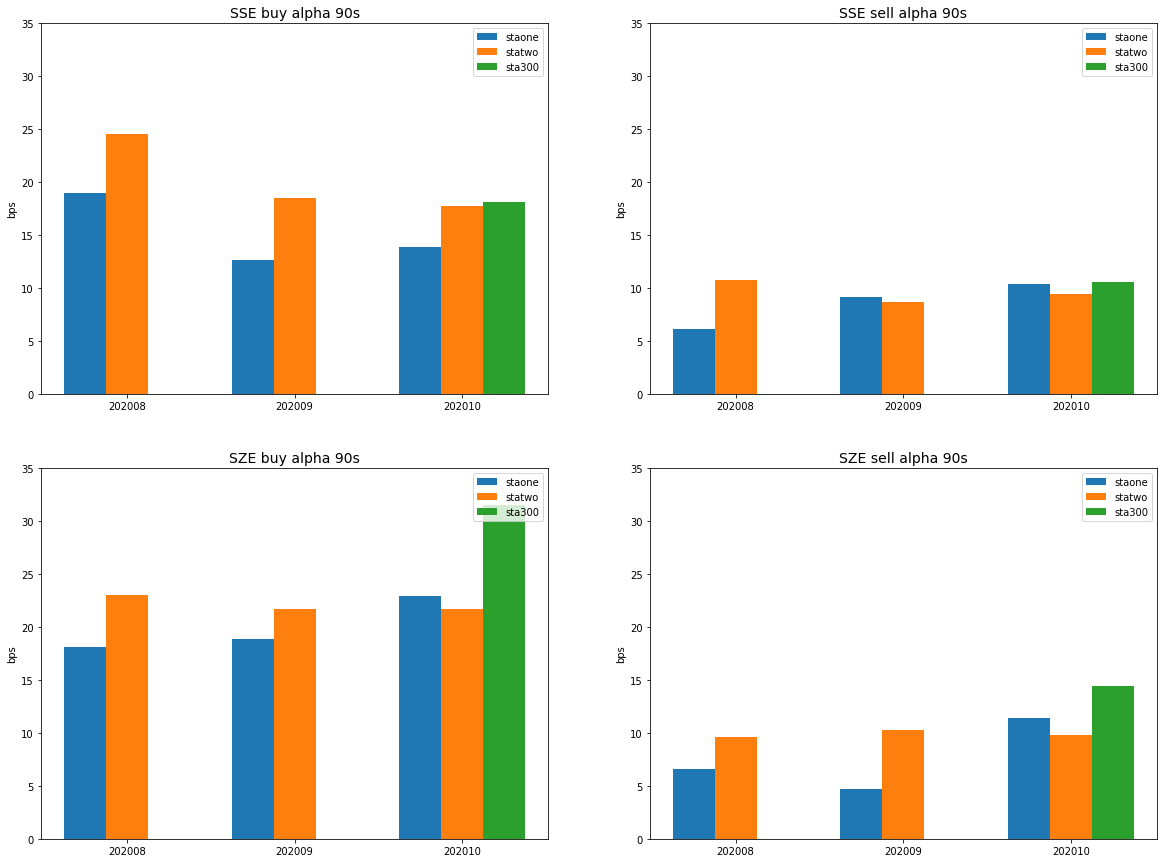

In [9]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['TimesNewRoman']
mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(221)
width = 0.25
ax1.bar(np.arange(3)-width, df[(df['exchange'] == 'SSE') & (df['sta'] == '1. staone')]['buyAlpha_90s'], width = width, label='staone')
ax1.bar(np.arange(3), df[(df['exchange'] == 'SSE') & (df['sta'] == '2. statwo')]['buyAlpha_90s'], alpha=1, width=width, label='statwo')
list1 = [0, 0]
list1.append(float(df[(df['exchange'] == 'SSE') & (df['sta'] == '3. sta300')]['buyAlpha_90s']))
ax1.bar(np.arange(3)+width, list1, width = width, label='sta300')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SSE buy alpha 90s", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,35)

ax1 = fig.add_subplot(222)
width = 0.25
ax1.bar(np.arange(3)-width, df[(df['exchange'] == 'SSE') & (df['sta'] == '1. staone')]['sellAlpha_90s'], width = width, label='staone')
ax1.bar(np.arange(3), df[(df['exchange'] == 'SSE') & (df['sta'] == '2. statwo')]['sellAlpha_90s'], alpha=1, width=width, label='statwo')
list1 = [0, 0]
list1.append(float(df[(df['exchange'] == 'SSE') & (df['sta'] == '3. sta300')]['sellAlpha_90s']))
ax1.bar(np.arange(3)+width, list1, width = width, label='sta300')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SSE sell alpha 90s", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,35)

ax1 = fig.add_subplot(223)
width = 0.25
ax1.bar(np.arange(3)-width, df[(df['exchange'] == 'SZE') & (df['sta'] == '1. staone')]['buyAlpha_90s'], width = width, label='staone')
ax1.bar(np.arange(3), df[(df['exchange'] == 'SZE') & (df['sta'] == '2. statwo')]['buyAlpha_90s'], alpha=1, width=width, label='statwo')
list1 = [0, 0]
list1.append(float(df[(df['exchange'] == 'SZE') & (df['sta'] == '3. sta300')]['buyAlpha_90s']))
ax1.bar(np.arange(3)+width, list1, width = width, label='sta300')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SZE buy alpha 90s", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,35)

ax1 = fig.add_subplot(224)
width = 0.25
ax1.bar(np.arange(3)-width, df[(df['exchange'] == 'SZE') & (df['sta'] == '1. staone')]['sellAlpha_90s'], width = width, label='staone')
ax1.bar(np.arange(3), df[(df['exchange'] == 'SZE') & (df['sta'] == '2. statwo')]['sellAlpha_90s'], alpha=1, width=width, label='statwo')
list1 = [0, 0]
list1.append(float(df[(df['exchange'] == 'SZE') & (df['sta'] == '3. sta300')]['sellAlpha_90s']))
ax1.bar(np.arange(3)+width, list1, width = width, label='sta300')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SZE sell alpha 90s", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,35)

plt.show()

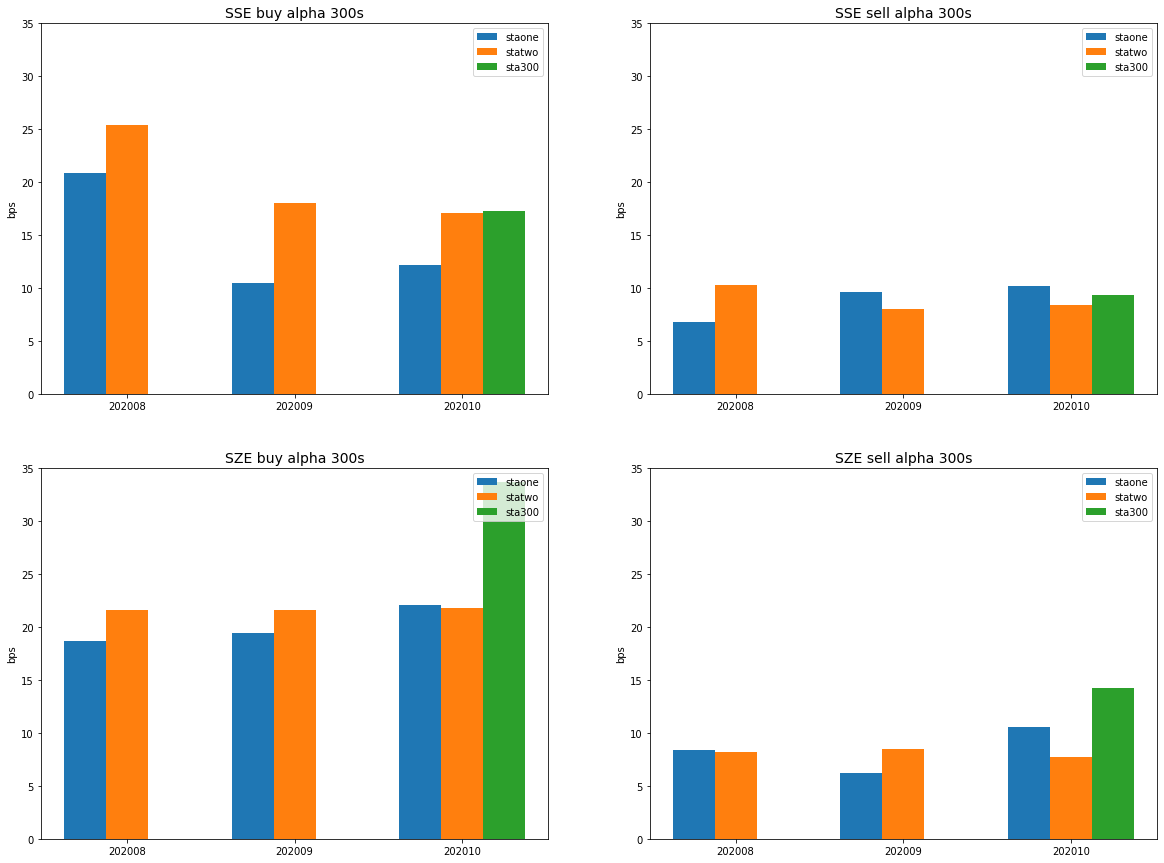

In [10]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['TimesNewRoman']
mpl.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(221)
width = 0.25
ax1.bar(np.arange(3)-width, df[(df['exchange'] == 'SSE') & (df['sta'] == '1. staone')]['buyAlpha_300s'], width = width, label='staone')
ax1.bar(np.arange(3), df[(df['exchange'] == 'SSE') & (df['sta'] == '2. statwo')]['buyAlpha_300s'], alpha=1, width=width, label='statwo')
ax1.bar(np.arange(3)+width, [0, 0] + list(df[(df['exchange'] == 'SSE') & (df['sta'] == '3. sta300')]['buyAlpha_300s']), width = width, label='sta300')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SSE buy alpha 300s", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,35)

ax1 = fig.add_subplot(222)
width = 0.25
ax1.bar(np.arange(3)-width, df[(df['exchange'] == 'SSE') & (df['sta'] == '1. staone')]['sellAlpha_300s'], width = width, label='staone')
ax1.bar(np.arange(3), df[(df['exchange'] == 'SSE') & (df['sta'] == '2. statwo')]['sellAlpha_300s'], alpha=1, width=width, label='statwo')
ax1.bar(np.arange(3)+width, [0, 0] + list(df[(df['exchange'] == 'SSE') & (df['sta'] == '3. sta300')]['sellAlpha_300s']), width = width, label='sta300')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SSE sell alpha 300s", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,35)

ax1 = fig.add_subplot(223)
width = 0.25
ax1.bar(np.arange(3)-width, df[(df['exchange'] == 'SZE') & (df['sta'] == '1. staone')]['buyAlpha_300s'], width = width, label='staone')
ax1.bar(np.arange(3), df[(df['exchange'] == 'SZE') & (df['sta'] == '2. statwo')]['buyAlpha_300s'], alpha=1, width=width, label='statwo')
ax1.bar(np.arange(3)+width, [0, 0] + list(df[(df['exchange'] == 'SZE') & (df['sta'] == '3. sta300')]['buyAlpha_300s']), width = width, label='sta300')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SZE buy alpha 300s", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,35)

ax1 = fig.add_subplot(224)
width = 0.25
ax1.bar(np.arange(3)-width, df[(df['exchange'] == 'SZE') & (df['sta'] == '1. staone')]['sellAlpha_300s'], width = width, label='staone')
ax1.bar(np.arange(3), df[(df['exchange'] == 'SZE') & (df['sta'] == '2. statwo')]['sellAlpha_300s'], alpha=1, width=width, label='statwo')
ax1.bar(np.arange(3)+width, [0, 0] + list(df[(df['exchange'] == 'SZE') & (df['sta'] == '3. sta300')]['sellAlpha_300s']), width = width, label='sta300')
ax1.set_ylabel("bps")
plt.xticks(np.arange(3), ['202008', '202009', '202010'])
plt.title("SZE sell alpha 300s", fontsize=14)
ax1.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.ylim(0,35)

plt.show()